In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('Mall_Customers.csv')

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
df = df.drop('CustomerID',axis=1)

In [18]:
df.replace({'Gender':{'Male':0,'Female':1}})

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [19]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
import seaborn as sns

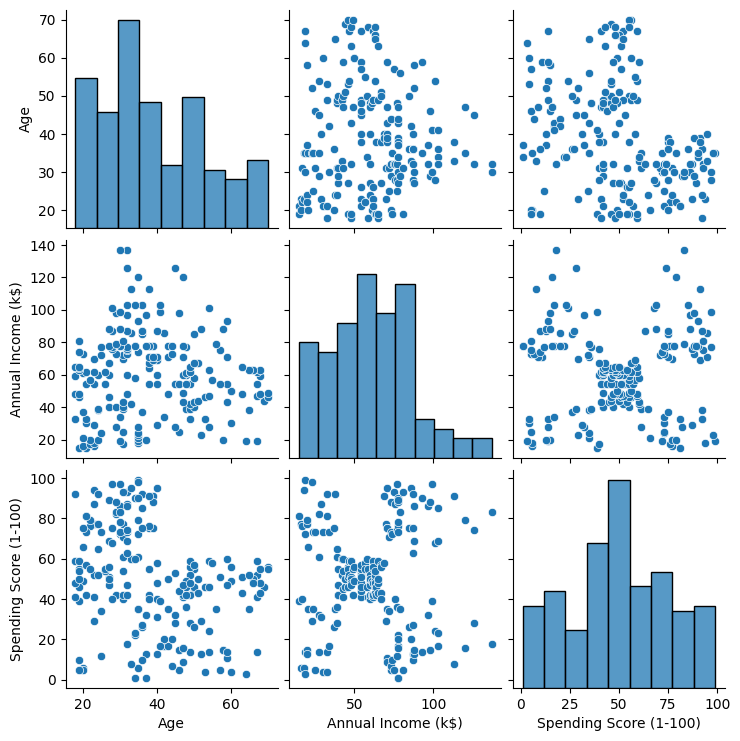

In [21]:
sns.pairplot(df[['Age',	'Annual Income (k$)',	'Spending Score (1-100)']])  #Bujhar jonno je kara help korteche clusster korte

In [22]:
import sklearn.cluster as cluster

In [23]:
km = cluster.KMeans(n_clusters=5)

In [25]:
km.fit(df[['Annual Income (k$)',	'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [26]:
df['Label']=km.labels_

In [27]:
df.head(4)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2


In [29]:
df['Label'].value_counts()

Label
2    100
1     37
0     32
4     23
3      8
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

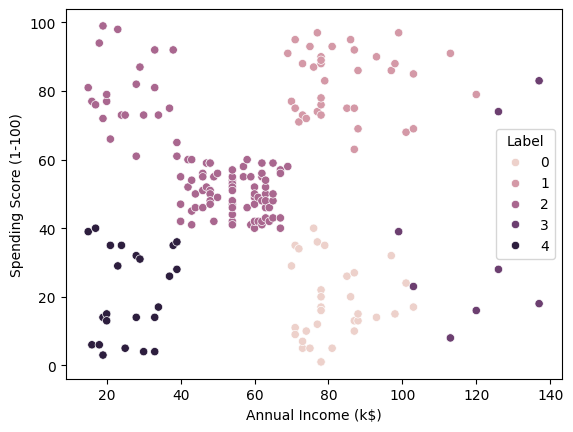

In [30]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Label')

In [31]:
wcss=[]
for i in range(1,15):
    km = cluster.KMeans(n_clusters=i)
    km.fit(df[['Annual Income (k$)',	'Spending Score (1-100)']])
    wcss.append(km.inertia_)
    

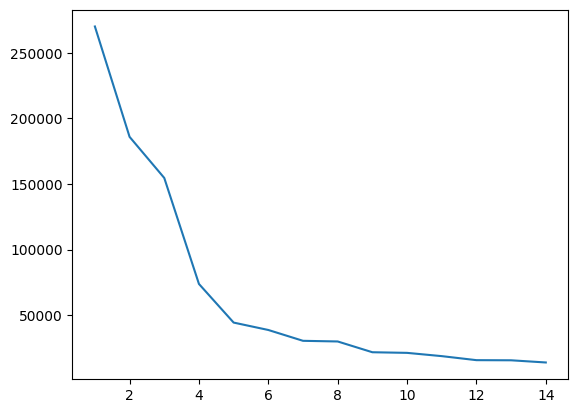

In [33]:
plt.plot(range(1,15),wcss)